In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math, os, sys
import itertools
import pandas as pd
import keras
import matplotlib.pyplot as plt
plt.style.use('default')

from scipy import ndimage
from shutil import copyfile
from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/drive/My Drive/model skripsi/model3.1.1.h5')
model2 = load_model('/content/drive/My Drive/model skripsi/model3.1.2.h5')
model3 = load_model('/content/drive/My Drive/model skripsi/model3.1.3.h5')
model4 = load_model('/content/drive/My Drive/model skripsi/model3.1.4.h5')
model5 = load_model('/content/drive/My Drive/model skripsi/model3.1.5.h5')

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 8
base_dir1 = os.path.join('/content/drive/My Drive/model skripsi/jagung b/train')
base_dir2 = os.path.join('/content/drive/My Drive/model skripsi/jagung b/val')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, # Rescale pixel
    rotation_range=5,  # randomly rotate images in the range 5 degrees
    horizontal_flip=True,  # flip images horizontally
    zoom_range = 0.1, # Randomly zoom image 10%
    width_shift_range=0.1,  # randomly shift images horizontally 10%
    height_shift_range=0.1, # randomly shift images vertically 10%
    brightness_range=[0.2,1.5], # randomly darkening and brightening the image
    fill_mode='nearest')

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir1,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

val_generator = val_datagen.flow_from_directory(
    base_dir2,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2930 images belonging to 4 classes.
Found 626 images belonging to 4 classes.


Saving gray (1).JPG to gray (1).JPG
1/1 [==============================] - 0s 461ms/step
[[0. 0. 1. 0.]]
2
gray leaf spot


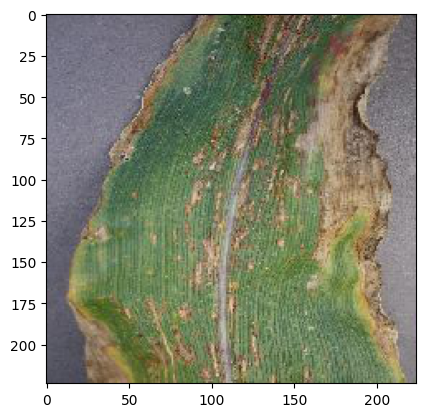

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array


masukan_gambar = files.upload()
pred_indicates = train_generator.class_indices

for i in masukan_gambar.keys():

  path = i
  gambar = keras.utils.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(gambar)
  a =img_to_array(gambar)
  b = np.expand_dims(a, axis=0)

  images = np.vstack([b])
  kelas = model3.predict(images, batch_size=8)
  akhir = np.argmax(kelas)

  print(kelas)
  print(akhir)

  for key, value in pred_indicates.items():
    if value==akhir:
      print(key)